## Problem 1: The quantitative analysis and understanding of tSNE embeddings
**A.** Apply tSNE to synthetic data generated from a Gaussian mixture model with 3 mixtures in a 10 dimensional space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# The make_blobs() function can be used to generate blobs of points with a Gaussian distribution.
# You can control how many blobs to generate and the number of samples to generate, as well as the dimensions.
# Generate 1000 points of synthetic data
X, Y = make_blobs(n_samples=1000, centers=3, n_features=10)

In [2]:
from sklearn.decomposition import PCA
def get_pca(X):
    mean_vec = np.mean(X, axis=0)
    cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
    eigv, eigvec = np.linalg.eig(cov_mat)
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eigv[i]), eigvec[:,i]) for i in range(len(eigv))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    return eig_pairs

def project_pca(X, eigpairs, components): 
    size = len(eigpairs[0][1])
    eigvec = eigpairs[0][1].reshape(size, 1)
    for i in range(1, components): 
        eigvec = np.hstack((eigvec, 
                   eigpairs[i][1].reshape(size, 1)))
    return X.dot(eigvec)

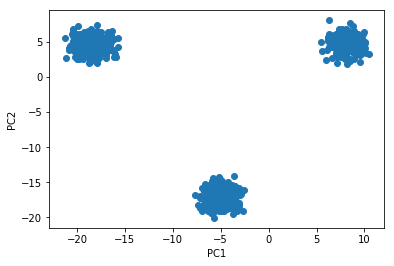

In [3]:
comp = project_pca(X, get_pca(X), 2)
x, y = comp[:,0], comp[:,1]
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(x, y)

Perplexity: 6


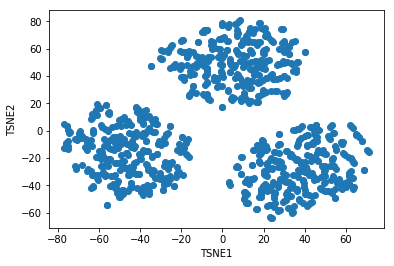

In [4]:
from sklearn.manifold import TSNE
def get_TSNE(X, components, p): 
    # perform TSNE on the sampled points
    tsne = TSNE(n_components=components, perplexity=p)
    tsne_data = tsne.fit_transform(X)
    return tsne_data
tsne_data = get_TSNE(X, 2, 6)
print("Perplexity: 6")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.scatter(tsne_data[:,0], tsne_data[:,1])

**B.** Generate synthetic data drawn from a 3 component mixture model where one mixture has total variance at least 5x the other two.

In [5]:
import random, math
def three_multivariate_distros(points, m1, m2, m3, cov1, cov2, cov3, w1=0.33, w2=0.33, w3=0.33): 
    x0 = np.random.multivariate_normal(m1, cov1, (1, 1, math.floor(points*w1)))[0][0]
    x1 = np.random.multivariate_normal(m2, cov2, (1, 1, math.floor(points*w2)))[0][0]
    x2 = np.random.multivariate_normal(m3, cov3, (1, 1, math.floor(points*w3)))[0][0]
    dataset = np.concatenate((np.concatenate((x0, x1)), x2))
    return x0, x1, x2, dataset

cov1 = np.zeros((10, 10), int)
np.fill_diagonal(cov1, 1)
cov2 = cov1.copy()
np.fill_diagonal(cov2, 10)
m1, m2, m3 = random.choices(np.arange(100), k=10), random.choices(np.arange(100), k=10), random.choices(np.arange(100), k=10)
mix1, mix2, mix3, data_1b = three_multivariate_distros(1000, m1, m2, m3, cov1, cov1, cov2)

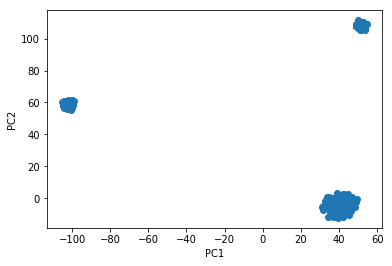

In [6]:
comp1 = project_pca(data_1b, get_pca(data_1b), 2)
x1, y1 = comp1[:,0], comp1[:,1]
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(x1, y1)

Perplexity: 6


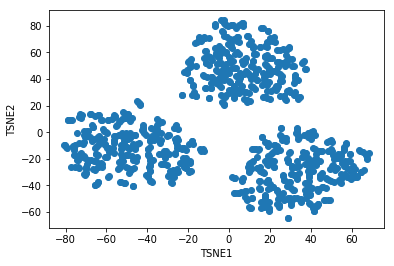

In [7]:
tsne_data1 = get_TSNE(data_1b, 2, 6)
print("Perplexity: 6")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.scatter(tsne_data1[:,0], tsne_data1[:,1])

**C.** Generate synthetic data drawn from a 3 component mixture model where one mixture has a weighting of .5 and the other mixtures have a weight of .25, so that 50% of data is being generated by one mixture. 

In [8]:
cov3 = np.zeros((10, 10), int)
np.fill_diagonal(cov3, 2)
m4, m5, m6 = random.choices(np.arange(100), k=10), random.choices(np.arange(100), k=10), random.choices(np.arange(100), k=10)
mix4, mix5, mix6, data_1c = three_multivariate_distros(1000, m4, m5, m6, cov3, cov3, cov3, w1=0.25, w2=0.25, w3=0.5)

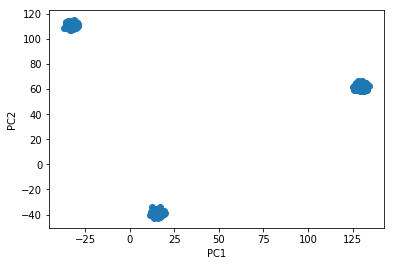

In [9]:
comp2 = project_pca(data_1c, get_pca(data_1c), 2)
x2, y2 = comp2[:,0], comp2[:,1]
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(x2, y2)

Perplexity: 6


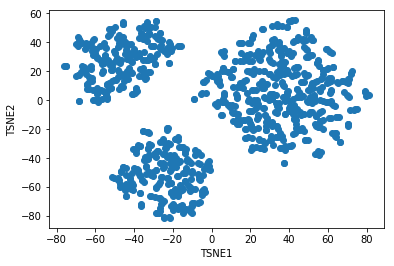

In [10]:
tsne_data2 = get_TSNE(data_1c, 2, 6)
print("Perplexity: 6")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.scatter(tsne_data2[:,0], tsne_data2[:,1])

*Comment on the potential relationship between mixture weight, mixture variance, and blob size in tSNE and PCA. Based upon your knowledge of tSNE, speculate as to why tSNE and PCA might produce qualitatively different geometric structures.*

As shown in the experiments above, we first see that changing mixture variance shows a change in the PCA graph, but no noticeable difference in the tSNE graph. In part b, where one covariance matrix was scaled to produce a distribution with a much higher variance than the other two distributions, the PCA graph shows one blob that is visibly larger than the other two blobs that correspond to the distributions with lower variance. This makes sense, as PCA is a mathematical method that separates points based on highest variance. In part b, the tSNE graph has blobs of generally the same size. 

In part c, where we vary the mixture weight such that half the points are sampled from one distribution and a quarter of the points from each of the two remaining distributions, we can again note the difference between PCA and tSNE. The graph of PCA doesn't have any distinguishing features; all the blobs appear to be the same size. However, in the tSNE graph, we see very clearly that one blob is larger than the other two (double the size) and seems to consist of half of all the points, which is how we weighted the data. This graph makes sense since tSNE attempts to group points based on the probability that two nearby points came from the same probability distribution, explaining why our graph shows roughly 50% of the points in the largest blob, and 25% of the points split between the remaining two blobs. 

tSNE and PCA return qualitatively different geometric structures because they search for different trends in the data. While PCA separates points based on variance, tSNE groups points together based on characteristics. 

## Problem 2: Cell-type specific responses and IFNG signaling
**Data Normalization**

**(1)** Column normalize the data by dividing each column by its column sum and multiplying by 100,000. 

In [12]:
import csv
reader = csv.reader(open("data/datamatrix_bio.csv"), delimiter=",")
x = list(reader)
result = np.array(x).astype("float")

In [13]:
from scipy.sparse import csr_matrix
ifnp_data = csr_matrix(np.asmatrix(result)).todense()

In [14]:
sums = np.sum(ifnp_data, axis = 0)
ifnp_norm = ifnp_data / sums
ifnp_norm *= 100000

**(2)** For every gene, calculate the coefficient of variation of the gene and the mean.

In [15]:
scatter = []
for gene in ifnp_norm: 
    if np.sum(gene) != 0:
        mean = np.mean(gene)
        stddev = np.std(gene)
        cv = (stddev/mean)
        scatter.append([mean, stddev, cv])
scatter = np.asmatrix(scatter)
print(np.asarray(scatter))

[[2.26231319e-02 5.60585467e-01 2.47793041e+01]
 [2.16027366e-01 3.40353264e+00 1.57550995e+01]
 [1.18160183e+00 6.88893508e+00 5.83016622e+00]
 ...
 [7.14694169e-03 3.21064970e-01 4.49234070e+01]
 [1.53616390e-01 2.95548199e+00 1.92393662e+01]
 [9.35077984e-02 2.77304131e+00 2.96557224e+01]]


**(2, 3)** Plot on a log-log plot the mean vs the CV for each gene in the data set. Fit the log mean vs log cv plot to a line, and write down the slope and y-intercept. What are your expectations for the slope based upon a Poisson model? 

Coefficients of fitted line:  [-0.45538993  0.79090102]


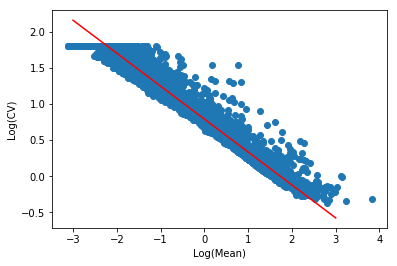

In [16]:
means = np.asarray(np.ndarray.flatten(np.log10(scatter[:,0])))[0]
Cv = np.asarray(np.ndarray.flatten(np.log10(scatter[:,2])))[0]
plt.xlabel("Log(Mean)")
plt.ylabel("Log(CV)")
fig = plt.scatter(means, Cv)
trend = np.polyfit(means, Cv, 1)
trendpoly = np.poly1d(trend) 
print("Coefficients of fitted line: ", trend)
plt.plot(np.arange(-3, 4),trendpoly(np.arange(-3, 4)), color="red")

The slope of the fitted line is -0.45538993 and the y-intercept is 0.79090102. Relative to the expectations for a Poisson Model, the slope is around the expected value of -1/2. We have an intercept because these values are obtained through measurement.

**(4, 5)** Select genes that fall above this line. Create a new data matrix using these filtered genes.

In [17]:
slope = trend[0]
b = trend[1]
selected = []
genes = []
for idx, gene in enumerate(ifnp_norm): 
    if np.sum(gene) != 0:
        mean = np.mean(gene)
        stddev = np.std(gene)
        cv = (stddev/mean)
        if math.log10(cv) > b + slope*math.log10(mean):
            selected.append([idx, mean, cv])
            genes.append(np.asarray(gene)[0])
selected = np.asmatrix(selected)
genes = np.asmatrix(genes)

**(6, 7)** Log normalize the data by taking log(1+g) for each gene entry. Perform PCA on the data and generate a 3D plot where you color points by whether they are IFGN+ or IFGN-. 

In [18]:
indices = selected[:,0]
ifnp_lognorm = np.log10(genes + 1.0)
# cells x genes 
log_comp = project_pca(ifnp_lognorm.T, get_pca(ifnp_lognorm.T), 3)

In [15]:
reader1 = csv.reader(open("data/meta_bio_IFNG+1.csv"), delimiter=",")
x1 = list(reader1)
indicators = np.array(x1).astype("float").T[0]

In [16]:
print(indicators)

[0. 0. 0. ... 1. 1. 1.]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


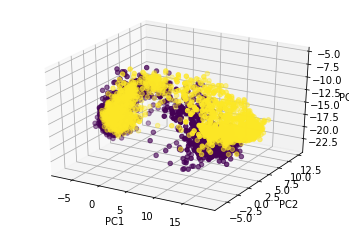

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# note: all imaginary parts are equal to 0
x3 = np.asarray(log_comp[:,0]).astype("float")
y3 = np.asarray(log_comp[:,1]).astype("float")
z3 = np.asarray(log_comp[:,2]).astype("float")

ax.scatter(x3, y3, z3, c=indicators)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

**(8)** Plot the normalized magnitude of the first 20 principle component eigenvalues of the data (order eigenvalues by magnitude). 

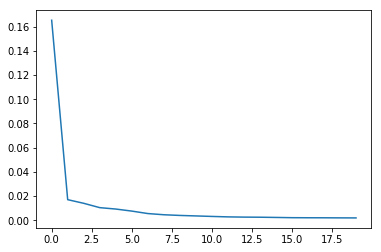

In [22]:
eigpairs = get_pca(ifnp_lognorm.T)
eigv = []
for i in range(len(eigpairs)): 
    eigv.append(eigpairs[i][0])
plt.plot(np.arange(20), eigv[:20]/sum(eigv))

**(9)** Use a tSNE function in Python or R (eg python: sklearn) to generate a tSNE plot of the merged IFGN+ and IFNG - data.

In [23]:
# Note: All imaginary parts are equal to 0
proj_data = project_pca(ifnp_lognorm.T, eigpairs, 10).astype("float")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [24]:
# perform TSNE 
tcomp = get_TSNE(proj_data, 2, 5)

Perplexity: 5


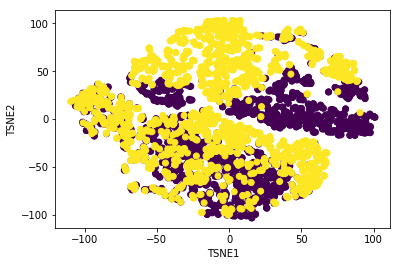

In [25]:
print("Perplexity: 5")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.scatter(tcomp[:,0], tcomp[:,1], c=indicators)

**(10)** Generate tSNE and PCA plots that color cells by their expression of each gene and note which cluster corresponds to each cell-type. By comparing your tSNE and PCA plots, comment as to whether IFNG is impacting all or a subset of cell-types. 

In [18]:
gene_names = ["CD19", "CD3D", "LYZ", "FLT3", "NKG7", "GBP1"]
reader2 = csv.reader(open("data/Bio_Final_Genes.csv"), delimiter=",")
x2 = list(reader2)
result2 = list(np.array(x2).flatten())
gene_idx = []
for name in gene_names: 
    gene_idx.append(result2.index(name))

In [27]:
pca_datag = project_pca(ifnp_lognorm.T, eigpairs, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


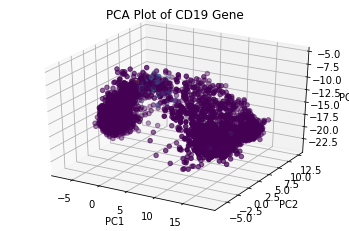

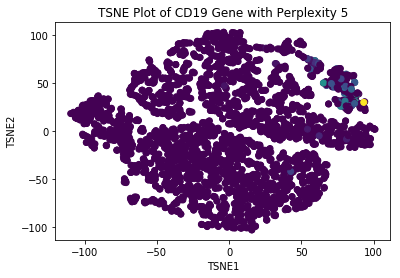

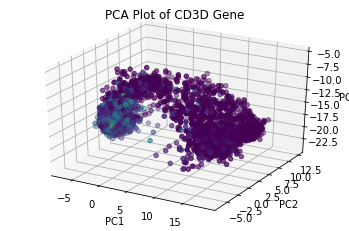

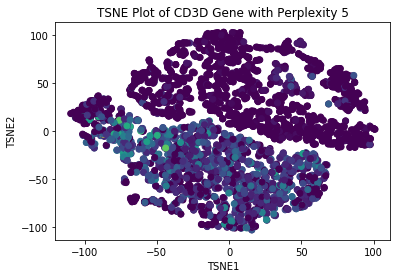

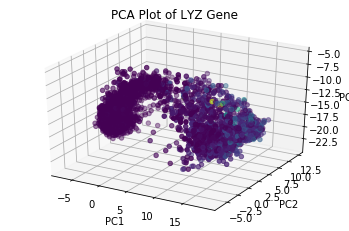

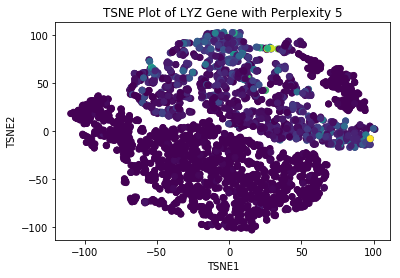

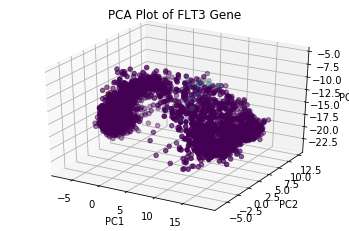

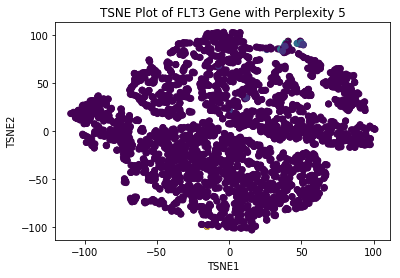

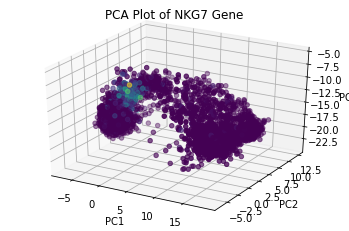

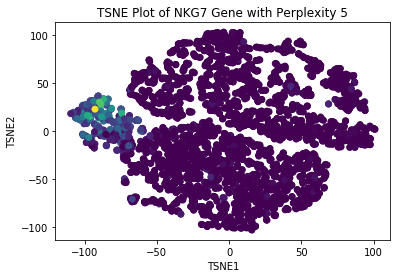

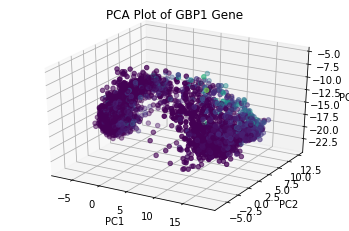

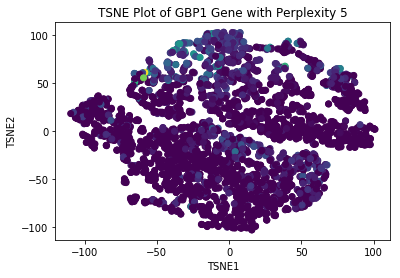

In [28]:
# note: the complex values have 0j as imaginary component
pca_datag = pca_datag.astype("float")
for idx, i in enumerate(gene_idx): 
    tmp_ind = []
    for cell in range(len(ifnp_norm.T)): 
        tmp_ind.append(np.asarray(ifnp_norm)[i][cell])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_datag[:,0], pca_datag[:,1], pca_datag[:,2], c=tmp_ind)
    ax.set_title("PCA Plot of {} Gene".format(gene_names[idx]))
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()
    plt.title("TSNE Plot of {} Gene with Perplexity 5".format(gene_names[idx]))
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.scatter(tcomp[:,0], tcomp[:,1], c=tmp_ind)

In [19]:
for i, gene in enumerate(gene_idx):
    ifngmin = 0
    ifngplus = 0
    for idx, cell in enumerate(ifnp_norm.T): 
        data = np.asarray(cell)[0]
        if data[gene] > 0: 
            if indicators[idx] > 0: 
                ifngplus += 1
            else: 
                ifngmin += 1
    print("Cells that express gene {}: \nIFNG - {}\nIFNG + {}\n".format(gene_names[i], ifngmin, ifngplus))

Cells that express gene CD19: 
IFNG - 31
IFNG + 38

Cells that express gene CD3D: 
IFNG - 905
IFNG + 878

Cells that express gene LYZ: 
IFNG - 851
IFNG + 897

Cells that express gene FLT3: 
IFNG - 12
IFNG + 28

Cells that express gene NKG7: 
IFNG - 281
IFNG + 287

Cells that express gene GBP1: 
IFNG - 228
IFNG + 1015



From the graphs above and the analysis that directly calculates the difference in IFNG- and IFNG+ cells between cell types, we can see the impact is greatest on cells which express GBP1, which are the activated macrophages. From this analysis, it seems that IFNG is affecting mainly GBP1 expressing cells, since most of the other cells don't have a large different between their IFNG- and IFNG+ split. 

**(11)** First, perform non-negative matrix factorization on the data to extract a W and H matrix. Use an inner dimension of 10. Generate tSNE scatter plots where you color the cells in your plot by different rows from the H matrix.

In [30]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(np.log10(ifnp_norm + 1))
H = model.components_

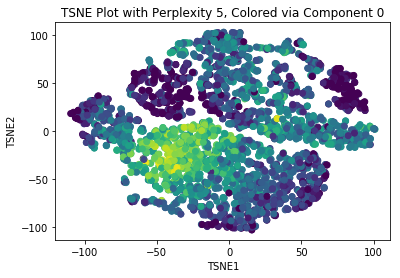

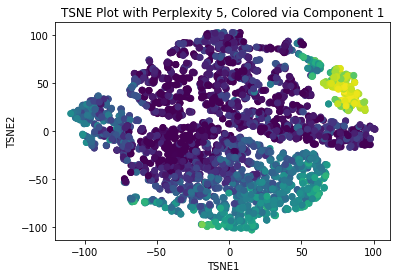

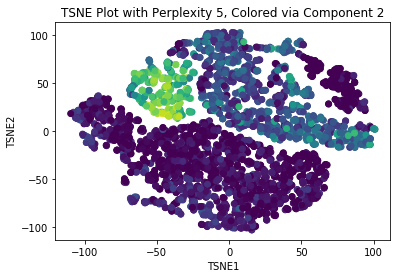

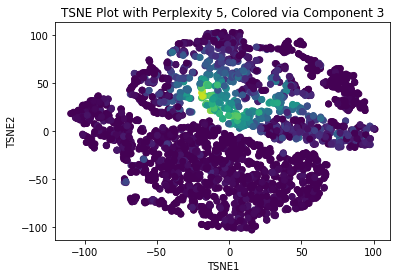

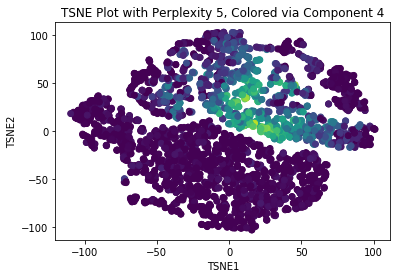

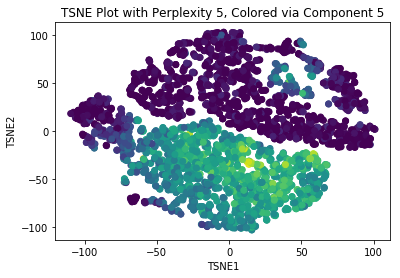

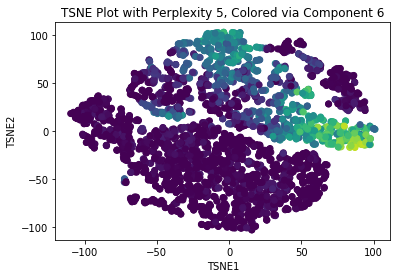

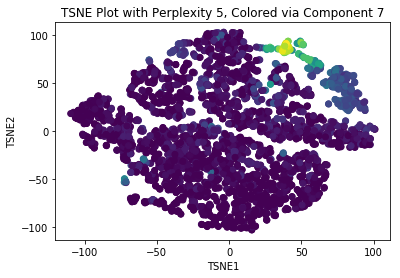

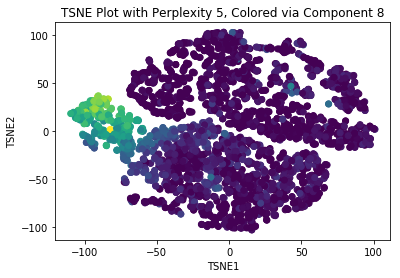

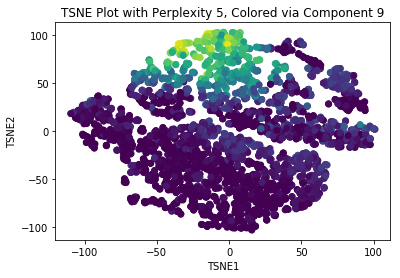

In [31]:
for i, row in enumerate(H): 
    plt.show()
    plt.title("TSNE Plot with Perplexity 5, Colored via Component {}".format(i))
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.scatter(tcomp[:,0], tcomp[:,1], c=row)

**(12)** Which NMF parts correlate with the presence or absence of IFNG? Plot the correlation coefficient for each NMF part (Rows of H) with an indicator vector that is 1 for IFNG+ and 0 for IFNG- cells. 

<BarContainer object of 10 artists>

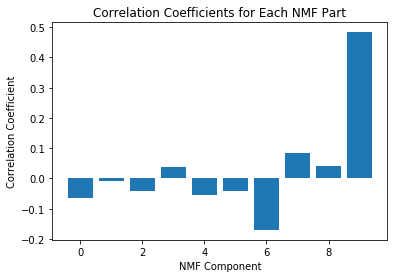

In [32]:
coefs = []
for row in H: 
    co = np.asarray(np.corrcoef(row, indicators))[0]
    coefs.append(co[1])
    
plt.title("Correlation Coefficients for Each NMF Part")
plt.xlabel("NMF Component")
plt.ylabel("Correlation Coefficient")
plt.bar(np.arange(0, 10), coefs)

It seems that NMF components 6 and 9 correlate with the presence or absence of IFNG, since those bars have the highest magnitudes. 

**(13)** Plot histograms of H rows for the IFNG + and IFNG - condition. For the histograms use 20 bins that span the min and max of H across both data sets.  

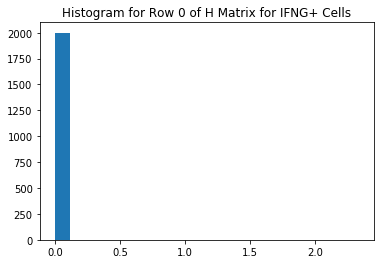

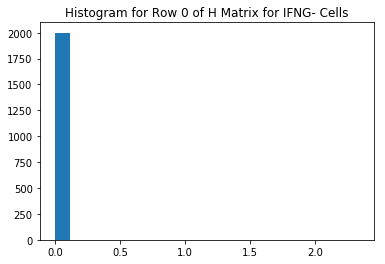

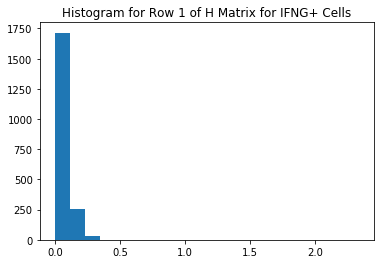

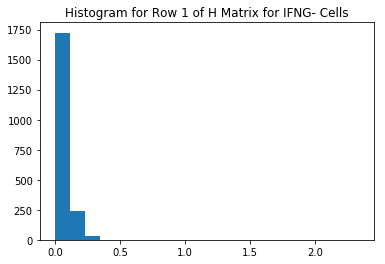

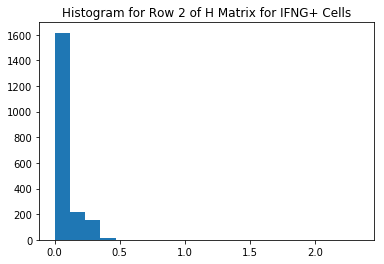

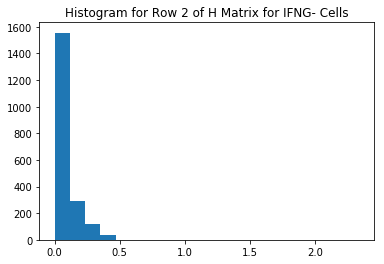

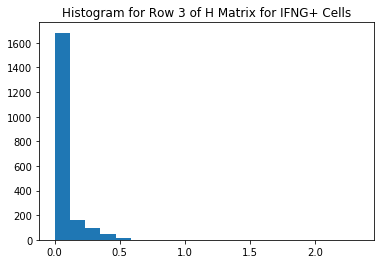

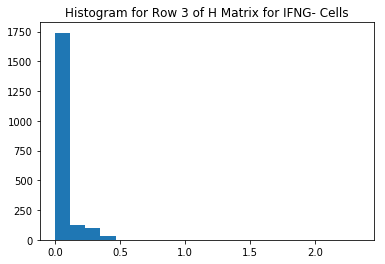

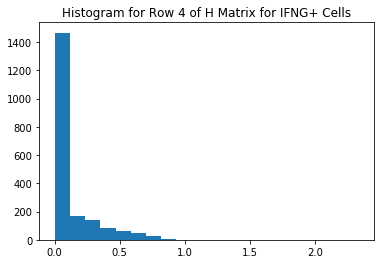

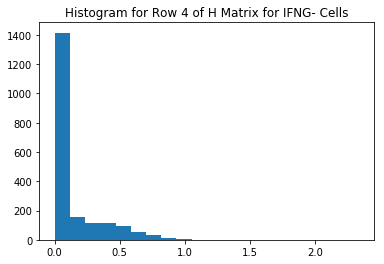

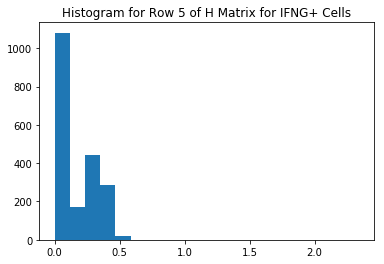

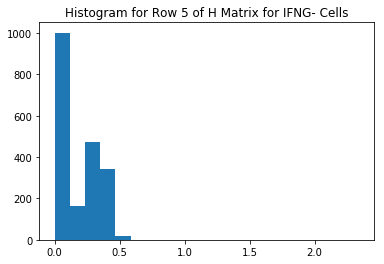

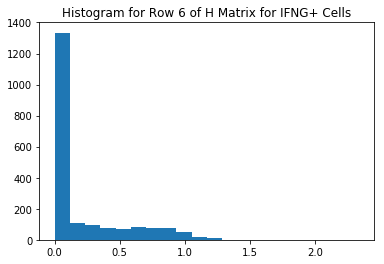

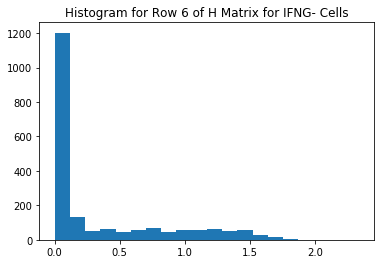

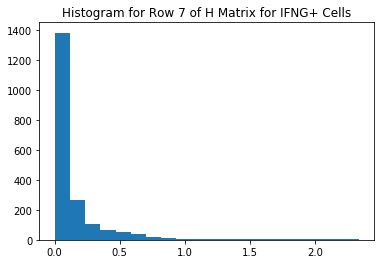

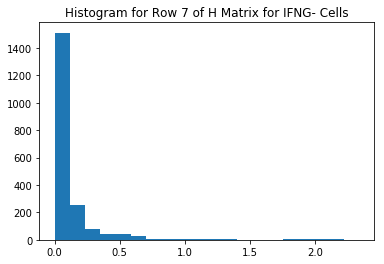

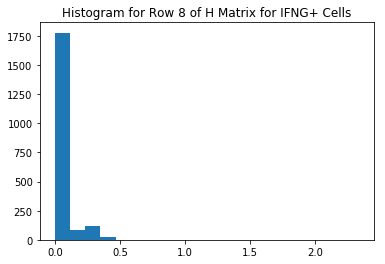

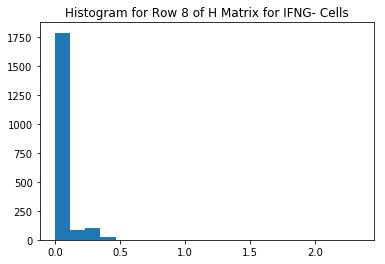

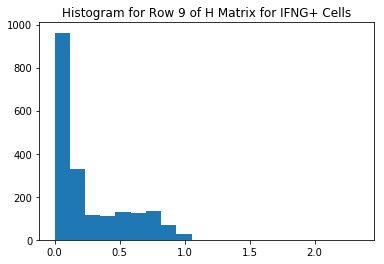

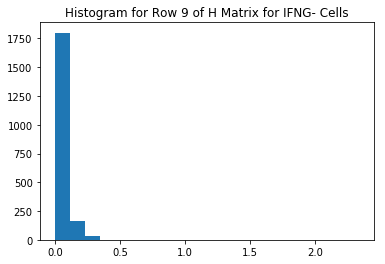

In [33]:
hmin = np.min(H)
hmax = np.max(H)
hplus = []
hminus = []
for i, row in enumerate(H):
    plus = []
    minus = []
    for idx, el in enumerate(row):
        if indicators[idx] == 1:
            plus.append(el)
        else: 
            minus.append(el)
    plt.show()
    plt.title("Histogram for Row {} of H Matrix for IFNG+ Cells".format(i))
    plt.hist(plus, bins=20, range=(hmin, hmax))
    plt.show()
    plt.title("Histogram for Row {} of H Matrix for IFNG- Cells".format(i))
    plt.hist(minus, bins=20, range=(hmin, hmax))
    hplus.append(np.histogram(plus, bins=20, range=(hmin, hmax))[0])
    hminus.append(np.histogram(minus, bins=20, range=(hmin, hmax))[0])

**(14)**  For each row of H, calculate the L1 norm between the histograms of the IFNG+ and IFNG- data. You can calculate the L1 norm on a per bin basis. Calculate the difference between the number of IFNG+ cells and IFNG- cells in each bin. Take the absolute value of this number and sum across bins. Plot the L1 norm of the histogram difference for each NNMF part. 

<BarContainer object of 10 artists>

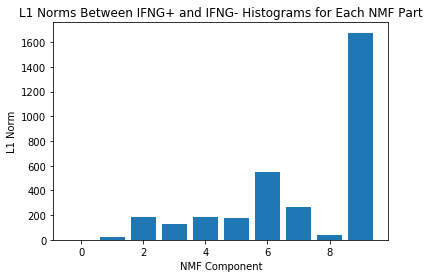

In [34]:
norms = []
for i in range(len(hplus)): 
    norms.append(sum(abs(hplus[i] - hminus[i])))
    
plt.title("L1 Norms Between IFNG+ and IFNG- Histograms for Each NMF Part")
plt.xlabel("NMF Component")
plt.ylabel("L1 Norm")
plt.bar(np.arange(0, 10), norms)

**(15)** Select two NMF components that are of interest to you based upon this analysis. Plot their “activity” (H row) across the cell population in tSNE plots. 

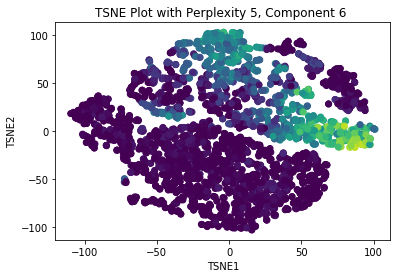

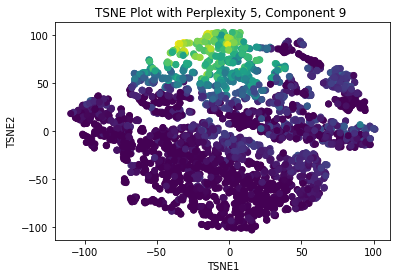

In [35]:
# selected components 6 and 9
sel_comp = [6, 9]
for comp in sel_comp: 
    plt.show()
    plt.title("TSNE Plot with Perplexity 5, Component {} ".format(comp))
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.scatter(tcomp[:,0], tcomp[:,1], c=H[comp])

**(16)** What are the key genes in this component (analyze top entries in W matrix)? STAT1 is a component of the IFGN signaling pathway. Does this gene appear in your signal correlated component? What about GBP1?

In [37]:
# selected component 9, since it has a significantly larger correlation coefficient than the rest of the components
# take top 20 genes (out of 30000+)
top20 = np.asarray(np.argpartition(W[:,9].T, -20)[-20:])
for gene in top20[::-1]: 
    if result2[gene] == "STAT1" or result2[gene] == "GBP1": 
        print()
        print('\033[1m' + str(result2[gene]) + ' ' + str(W[:,i][gene]) + '\033[0m')
        print()
    else: 
        print(result2[gene], W[:,i][gene])

HLA-DPA1 2.573217918214563
HLA-DRA 2.5790277101192687

STAT1 2.4618060193638183

HLA-DPB1 2.4320886966036626
LAP3 1.8989140863767942
WARS 2.022082935343138
PSME2 1.9266589495530413
HLA-DRB1 2.425748044812422
FGL2 1.826494889587617
HLA-DQB1 2.048450290806378
CD74 2.388931014841054
PSMB9 1.9456253009386335
TYMP 2.213892908643769
IRF1 1.9128910847981253
UBE2L6 1.868680145822115

GBP1 2.1409322548361125

VAMP5 2.3011536383852675
TAP1 1.825070631574376
FCER1G 1.7293556243008752
CTSL 1.6828484123352294


Yes, the genes STAT1 and GBP1 both appear within the top entries in the 9th component within the W matrix. 

**(17)** Are your NNMF components specific to one cell population? If so, which one? Or do you see them across the cell population?

The most prominent NNMF components, component 6 and component 9, seem to be specific to IFNG- and IFNG+ cell populations respectively. If we compare the TSNE graphs of components 6 and 9 with the TSNE graph of IFNG-/+ cells, we can see the yellow colored cells (IFNG+ cells) in the IFNG-/+ graph correspond to the non-purple (purple has been found to indicate no expression) colored cells in the TSNE graph colored via NMF component 9. Additionally, the cells in the TSNE graph colored via NMF component 6 correspond with the purple (IFNG-) colored cells in the IFNG-/+ graph, which indicates why component 6 has a negative correlation coefficient with the second highest magnitude after component 9. 

**(18)**  What cell-types do you observe in the IFNG (-) cell population? How do you think these cell-types respond to IFNG? Is the response cell type-specific or shared? 

All the cell-types were present in the IFNG - population, and there were around the same number of cells that were IFNG-/+ for each type except for cells that expressed GBP1. There were almost 5x more cells that expressed GBP1 that were also IFNG+ instead of IFNG-. GBP1 is expressed by activated macrophages, so we can infer that IFNG is crucial for macrophage activation, since so many more activated macrophages express IFNG+ than IFNG-. The response seem to be mainly concentrated in the GBP1 cell population, so it is cell specific. 

**(19)** If you had more time, what other analysis methods from the course would you apply to this data and what questions would you hope to answer? 

Louvain Clustering would be an interesting analysis method to apply to the dataset. Detecting a community of genes strongly related to GBP1 would be helpful to elucidate the behavior and effect of this gene, and further determine its relationship with IFNG. We would hope to answer questions about how IFNG affects cell types more specifically. As groups of cells are found with similar gene expression profiles, we can then determine which groups are most impacted by IFNG in the experiment. 

**(20)** What does IFNG probably impact in the monocyte population -- thinking about your markers GBP1 and LYZ -- in the control versus signal treated cells? 

Monocytes are undifferentiated white blood cells, and we already observed the trend where the addition of IFNG created an increase in the amount of activated macrophages. This implies that IFNG probably plays a role in differentiating monocytes into macrophages to produce an immune response. 